# 1. OpenFOAMのインストール

In [1]:
%%bash
sudo apt-get update
sudo apt-get install -y software-properties-common
sudo sh -c "wget -O - https://dl.openfoam.org/gpg.key | apt-key add -"
sudo add-apt-repository http://dl.openfoam.org/ubuntu
sudo apt-get update
sudo apt-get install -y openfoam9 git
source /opt/openfoam9/etc/bashrc
# pip install PyFoam
pip3 install vtk

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,543 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,850 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,633 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,964 kB]
Get:14 http://security.ubuntu.c

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
--2025-12-16 10:20:58--  https://dl.openfoam.org/gpg.key
Resolving dl.openfoam.org (dl.openfoam.org)... 13.41.234.222
Connecting to dl.openfoam.org (dl.openfoam.org)|13.41.234.222|:443... Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
connected.
HTTP request sent, awaiting response... 200 OK
Length: 1710 (1.7K) [application/pgp-keys]
Saving to: ‘STDOUT’

     0K .                                                     100% 1.12G=0s

2025-12-16 10:20:58 (1.12 GB/s) - written to stdout [1710/1710]

W: http://dl.openfoam.org/ubuntu/dists/jammy/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://

# 2. 計算Caseを準備

In [2]:
%%bash
# Git clone the simulation files
git clone https://github.com/TabibitoDK/CitySimDemo01.git

Cloning into 'CitySimDemo01'...


In [3]:
%cd CitySimDemo01

/content/CitySimDemo01


Run this cell to update the git repository to latest

In [10]:
%%bash
git stash
git pull

No local changes to save
Updating ead0dc7..331a65a
Fast-forward
 OpenFOAM_City_Sim_02.ipynb | 10 +++++-----
 run_colab.sh               |  4 ++++
 system/fvSchemes           | 17 ++++++++++-------
 system/fvSolution          | 33 ++++++++++++++-------------------
 4 files changed, 33 insertions(+), 31 deletions(-)


From https://github.com/TabibitoDK/CitySimDemo01
   ead0dc7..331a65a  main       -> origin/main


# 3. 計算実行

In [ ]:
!checkMesh -allTopology -allGeometry -case "$case" 

In [11]:
%%bash
# . /opt/openfoam9/etc/bashrc
# source /opt/openfoam9/etc/bashrc
# surfaceFeatures                # builds constant/geometry/city_buildings.eMesh
# blockMesh                      # writes constant/polyMesh from blockMeshDict
# snappyHexMesh -overwrite       # refines with the STL
# checkMesh -allTopology -allGeometry
# simpleFoam                     # or decomposePar/mpirun if parallel
# ls

# adjust if your folder name/path differs
source /opt/openfoam9/etc/bashrc
case=/content/CitySimDemo01
export FOAM_CASE=$case

# Troubleshooting (if simpleFoam crashes with Floating point exception):
# - It's almost always (1) bad snappy mesh quality or (2) divergence producing NaN/Inf.
# - Re-run: checkMesh -allTopology -allGeometry -case "$case" and fix any ***Error.
# - Quick isolation: disable layers (set addLayers false; in system/snappyHexMeshDict), then rerun snappyHexMesh/checkMesh.
# - Note: pressure equation is symmetric; in fvSolution use symmetric preconditioners (DIC/FDIC/diagonal/none). DILU will error.
# - Helpful init: potentialFoam -case "$case" -writep (run after snappyHexMesh, before simpleFoam).

echo "Using case: $case"
ls -l "$case/system" || true
ls -l "$case/constant/geometry" || true
test -f "$case/system/snappyHexMeshDict" || { echo "Missing $case/system/snappyHexMeshDict"; exit 1; }
test -f "$case/system/fvSchemes" || { echo "Missing $case/system/fvSchemes"; exit 1; }
test -f "$case/system/fvSolution" || { echo "Missing $case/system/fvSolution"; exit 1; }
test -f "$case/constant/geometry/city_buildings.stl" || { echo "Missing $case/constant/geometry/city_buildings.stl"; exit 1; }

surfaceFeatures -case "$case" -dict system/surfaceFeaturesDict
blockMesh -case "$case"
snappyHexMesh -overwrite -case "$case"
checkMesh -allTopology -allGeometry -case "$case"
simpleFoam -case "$case"   # or use decomposePar/mpirun if you adjust numberOfSubdomains

Using case: /content/CitySimDemo01
total 32
-rw-r--r-- 1 root root 1099 Dec 17 14:11 blockMeshDict
-rw-r--r-- 1 root root  953 Dec 17 14:11 controlDict
-rw-r--r-- 1 root root  249 Dec 17 14:11 decomposeParDict
-rw-r--r-- 1 root root  988 Dec 17 16:00 fvSchemes
-rw-r--r-- 1 root root 1658 Dec 17 16:00 fvSolution
-rw-r--r-- 1 root root 2974 Dec 17 14:11 snappyHexMeshDict
-rw-r--r-- 1 root root  602 Dec 17 14:11 surfaceFeatureExtractDict
-rw-r--r-- 1 root root  459 Dec 17 14:11 surfaceFeaturesDict
total 1232
-rw-r--r-- 1 root root   75552 Dec 17 15:18 city_buildings.eMesh
-rw-r--r-- 1 root root 1183584 Dec 17 14:11 city_buildings.stl
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  9
     \\/     M anipulation  |
\*------------------------------------------------



--> FOAM FATAL IO ERROR: 
Unknown symmetric matrix preconditioner DILU

Valid symmetric matrix preconditioners :

5
(
DIC
FDIC
GAMG
diagonal
none
)


file: 

    From function static Foam::autoPtr<Foam::lduMatrix::preconditioner> Foam::lduMatrix::preconditioner::New(const Foam::lduMatrix::solver&, const Foam::dictionary&)
    in file matrices/lduMatrix/lduMatrix/lduMatrixPreconditioner.C at line 90.

FOAM exiting



CalledProcessError: Command 'b'# . /opt/openfoam9/etc/bashrc\n# source /opt/openfoam9/etc/bashrc\n# surfaceFeatures                # builds constant/geometry/city_buildings.eMesh\n# blockMesh                      # writes constant/polyMesh from blockMeshDict\n# snappyHexMesh -overwrite       # refines with the STL\n# checkMesh -allTopology -allGeometry\n# simpleFoam                     # or decomposePar/mpirun if parallel\n# ls\n\n# adjust if your folder name/path differs\nsource /opt/openfoam9/etc/bashrc\ncase=/content/CitySimDemo01\nexport FOAM_CASE=$case\n\n# Troubleshooting (if simpleFoam crashes with Floating point exception):\n# - It\'s almost always (1) bad snappy mesh quality or (2) divergence producing NaN/Inf.\n# - Re-run: checkMesh -allTopology -allGeometry -case "$case" and fix any ***Error.\n# - Quick isolation: disable layers (set addLayers false; in system/snappyHexMeshDict), then rerun snappyHexMesh/checkMesh.\n# - Helpful init: potentialFoam -case "$case" -writep (run after snappyHexMesh, before simpleFoam).\n\necho "Using case: $case"\nls -l "$case/system" || true\nls -l "$case/constant/geometry" || true\ntest -f "$case/system/snappyHexMeshDict" || { echo "Missing $case/system/snappyHexMeshDict"; exit 1; }\ntest -f "$case/system/fvSchemes" || { echo "Missing $case/system/fvSchemes"; exit 1; }\ntest -f "$case/system/fvSolution" || { echo "Missing $case/system/fvSolution"; exit 1; }\ntest -f "$case/constant/geometry/city_buildings.stl" || { echo "Missing $case/constant/geometry/city_buildings.stl"; exit 1; }\n\nsurfaceFeatures -case "$case" -dict system/surfaceFeaturesDict\nblockMesh -case "$case"\nsnappyHexMesh -overwrite -case "$case"\ncheckMesh -allTopology -allGeometry -case "$case"\nsimpleFoam -case "$case"   # or use decomposePar/mpirun if you adjust numberOfSubdomains\n'' returned non-zero exit status 1.

In [ ]:
!foamToVTK

/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  9
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 9-b456138dc4bc
Exec   : foamToVTK
Date   : May 22 2022
Time   : 04:27:28
Host   : "c41d68992312"
PID    : 4131
I/O    : uncollated
Case   : /content/damBreak
nProcs : 1
sigFpe : Enabling floating point exception trapping (FOAM_SIGFPE).
fileModificationChecking : Monitoring run-time modified files using timeStampMaster (fileModificationSkew 10)
allowSystemOperations : Allowing user-supplied system call operations

// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
Create time

Create mesh for time = 0

Time: 0
    volScalarFields            : p_rgh alpha.water
    v

In [ ]:
!ls VTK

atmosphere	  damBreak_232.vtk  damBreak_412.vtk  damBreak_86.vtk
damBreak_0.vtk	  damBreak_262.vtk  damBreak_443.vtk  defaultFaces
damBreak_108.vtk  damBreak_304.vtk  damBreak_470.vtk  leftWall
damBreak_130.vtk  damBreak_30.vtk   damBreak_498.vtk  lowerWall
damBreak_15.vtk   damBreak_343.vtk  damBreak_522.vtk  rightWall
damBreak_173.vtk  damBreak_366.vtk  damBreak_539.vtk
damBreak_209.vtk  damBreak_387.vtk  damBreak_61.vtk


# 4. 可視化

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import vtk
from vtk.util.numpy_support import vtk_to_numpy
from scipy.interpolate import griddata
from ipywidgets import interact

filename = "VTK/damBreak_0.vtk"

reader = vtk.vtkUnstructuredGridReader()
reader.SetFileName(filename)
reader.Update()
data = reader.GetOutput()

# cell data から point data変換
cell2point = vtk.vtkCellDataToPointData()
cell2point.SetInputData(reader.GetOutput())
cell2point.Update()
# 座標データの配列化
# points = data.GetPoints()
# coord = vtk_to_numpy(points.GetData()) # (x,y,z)座標の2次元配列
coord = vtk_to_numpy(cell2point.GetOutput().GetPoints().GetData())

x = coord[:,0]
y = coord[:,1]
z = coord[:,2]

# メッシュグリッド用
xmin, xmax = min(x), max(x)
ymin, ymax = min(y), max(y)
xi = np.linspace(xmin, xmax, 100)
yi = np.linspace(ymin, ymax, 100)

In [ ]:
def plotVtk(t,isShow=True):
  filename = f'VTK/damBreak_{t}.vtk'

  reader = vtk.vtkUnstructuredGridReader()
  reader.SetFileName(filename)
  reader.Update()
  data = reader.GetOutput()

  # cell data から point data変換
  cell2point = vtk.vtkCellDataToPointData()
  cell2point.SetInputData(reader.GetOutput())
  cell2point.Update()

  # GetAbstractArray(0)は圧力、GetAbstractArray(1)は速度ベクトルデータ
  # p = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray(0))
  alpha = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray('alpha.water'))
  # print('alpha:',alpha)
  # print('0:',cell2point.GetOutput().GetPointData().GetArrayName(0))
  # print('1:',cell2point.GetOutput().GetPointData().GetArrayName(1))
  # print('2:',cell2point.GetOutput().GetPointData().GetArrayName(2))
  # print('3:',cell2point.GetOutput().GetPointData().GetArrayName(3))
  # print('4:',cell2point.GetOutput().GetPointData().GetArrayName(4))
  # u = vtk_to_numpy(cell2point.GetOutput().GetPointData().GetAbstractArray(3))
  # speed = np.sqrt(u[:,0]**2 + u[:,1]**2) # ベクトルをスカラー値に変換
  # U = u[:,0] # ベクトルをスカラー値に変換
  # V = u[:,1] # ベクトルをスカラー値に変換

  # 圧力のコンター図出力
  # levels = np.linspace(-5,5,21) # 描画する範囲の設定(最小，最大，色の分割数)
  # plt.tricontourf(x,y,p,levels=levels,cmap="jet",vmin=-5, vmax=5) #vmin,vmax で色の範囲を設定
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(-5,5.1,0.5)) # カラーバーの目盛り
  # cbar.set_label("p")
  # plt.show()

  # 流速のコンター図出力
  # levels = np.linspace(-1,1,21)
  # plt.tricontourf(x,y,U,levels=levels,cmap="jet", vmin=-1, vmax=1)
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(-1.0,1.01,0.1))
  # cbar.set_label("U")
  # # plt.quiver(x,y,U,V,color='red',angles='xy',scale_units='xy', scale=10.0) #長さでベクトル場を可視化
  # plt.quiver(x,y,U/speed,V/speed,speed,cmap='jet',scale=15.0) #カラーマップでベクトル場を可視化
  # # plt.streamplot(x,y,U/speed,V/speed,color=speed,cmap='jet')
  # plt.show()

  # 流線出力
  # levels = np.linspace(0,1,21)
  # velocity = griddata((x, y), u, (xi[None,:], yi[:,None]), method='linear') # 速度ベクトルをグリッドに合わせて線形補間
  # speed2 = np.sqrt(velocity[:,:,0]**2 + velocity[:,:,1]**2)
  # strm = plt.streamplot(xi, yi, velocity[:,:,0], velocity[:,:,1], linewidth=1, arrowstyle="-", density=1.5)
  # plt.tricontourf(x,y,speed,levels=levels,cmap="jet", vmin=0, vmax=1)
  # cbar = plt.colorbar()
  # cbar.set_ticks(np.arange(0,1.01,0.1))
  # cbar.set_label("|u|")
  # plt.show()

  # alphaのコンター図出力
  plt.axes().set_aspect('equal')
  levels = np.linspace(-0.01,1.01,21) # 描画する範囲の設定(最小，最大，色の分割数)
  plt.tricontourf(x,y,alpha,levels=levels,cmap="RdBu_r",vmin=-0.01, vmax=1.01) #vmin,vmax で色の範囲を設定
  cbar = plt.colorbar()
  cbar.set_ticks(np.arange(0,1.1,0.1)) # カラーバーの目盛り
  cbar.set_label("alpha")
  if isShow:
    plt.show()
  else:
    plt.savefig(f'VTK/damBreak_{t:03}.png')
    plt.close()


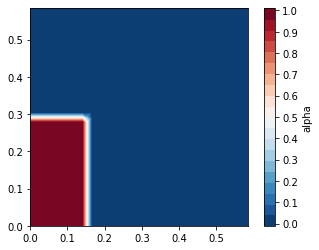

In [ ]:
plotVtk(t=0)

In [ ]:
times = [0,15,30,61,86,108,130,173,209,232,262,304,343,366,387,412,443,470,498,522,539]

for t in times:
  plotVtk(t=t,isShow=False)

In [ ]:
!ls VTK/

atmosphere	  damBreak_173.png  damBreak_343.vtk  damBreak_498.vtk
damBreak_000.png  damBreak_173.vtk  damBreak_366.png  damBreak_522.png
damBreak_015.png  damBreak_209.png  damBreak_366.vtk  damBreak_522.vtk
damBreak_030.png  damBreak_209.vtk  damBreak_387.png  damBreak_539.png
damBreak_061.png  damBreak_232.png  damBreak_387.vtk  damBreak_539.vtk
damBreak_086.png  damBreak_232.vtk  damBreak_412.png  damBreak_61.vtk
damBreak_0.vtk	  damBreak_262.png  damBreak_412.vtk  damBreak_86.vtk
damBreak_108.png  damBreak_262.vtk  damBreak_443.png  defaultFaces
damBreak_108.vtk  damBreak_304.png  damBreak_443.vtk  leftWall
damBreak_130.png  damBreak_304.vtk  damBreak_470.png  lowerWall
damBreak_130.vtk  damBreak_30.vtk   damBreak_470.vtk  rightWall
damBreak_15.vtk   damBreak_343.png  damBreak_498.png


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from PIL import Image
import glob

files = sorted(glob.glob('VTK/*.png'))
images = list(map(lambda file : Image.open(file) , files))
images[0].save('VTK/damBreak.gif' , save_all = True , append_images = images[1:] , duration = 200 , loop = 0)

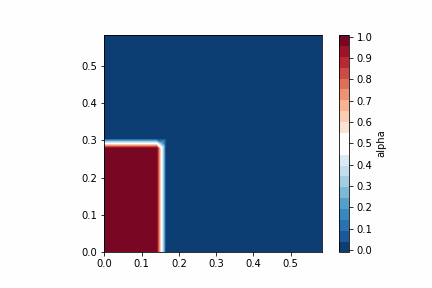

In [ ]:
from IPython import display
from pathlib import Path

gifPath = Path("VTK/damBreak.gif")

with open(gifPath,'rb') as f:
  display.Image(data=f.read(), format='png')

In [ ]:
from google.colab import files
files.download('VTK/damBreak.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>